# Trabajo práctico 1 : Analisis exploratorio del dataset Properatti

Grupo #11: Camila Coltriani, Irania Fuentes, Johnatan Fischelson, Luis Dartayet, Ornela Cevolli  

Para este trabajo utilizaremos un dataset de la inmobiliaría Properati construido con los datos de venta de propiedades en diferentes provincias de Argentina en el primer semestre del año 2017.

# Identificar el problema ¿o cambiar por objetivos?

El objetivo de este trabajo es realizar una limpieza del dataset properatti con la finalidad de obtener un dataset final con datos confiables que pueda ser utilizado en la generación de un modelo estadistico posterior.
Con base en esto se plantean los siguientes objetivos especificos:
 - Adquirir los datos: leer y conocer su estructura para determinar las herramientas apropiadas para su manipulación.

 - Parsear los datos: realizar el analisis exploratorio de los datos que permita verificar la existencia o no de relaciones entre variables, valores duplicados, valores faltantes, valores atípicos o valores erroneos que para validar o aumentar la confiabilidad de los datos.

 - Minar los datos: aplicar las herramientas de python para corregir datos erroneos o duplicados, completar/eliminar valores nulos.
 
 - Refinar los datos: eliminar variables redundantes o repetidas, crear nuevas variables y dar un formato limpio al dataset original.

# Adquirir y visualizar el dataset

In [2]:
#librerías utilizadas para la adquisición de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import geopandas as gpd
import shapely.wkt
from decimal import Decimal

TODO: otros recursos utilizados
- archivo de id_geonames: ar_copy.csv
- archivo de barrios Argentina: barrios.csv 

In [3]:
# Leemos y cargamos el dataset properatti.csv en una variable 
data = pd.read_csv("./properatti.csv", index_col=0)

In [10]:
# Visualización de la forma y atributos del dataset 
print(data.shape)
print("El dataset está compuesto por:", data.shape[0], "filas y",data.shape[1],"columnas.")
data.sample(5) #

(121220, 25)
El dataset está compuesto por: 121220 filas y 25 columnas.


,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
11805,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.889965,-60.7186437",-32.889965,-60.718644,...,90.0,NaN,8333.333333,NaN,NaN,NaN,http://www.properati.com.ar/16d2m_venta_depart...,"Departamento, Santa Fe, Rosario, por $ 750.000",RUCCI LADO MINITERMINAL,https://thumbs4.properati.com/9/0FixZ25RRIymK9...
33698,sell,apartment,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,NaN,NaN,NaN,...,56.0,3230.769231,3750.000000,3.0,NaN,NaN,http://www.properati.com.ar/189t1_venta_depart...,"Clasico edificio, construido por Arq. Poncio.-...",Departamento 65m² con Plantas en Del Libertado...,https://thumbs4.properati.com/0/OvJXdK30vfOhNp...
86754,sell,apartment,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,NaN,...,280.0,2035.714286,2035.714286,NaN,NaN,NaN,http://www.properati.com.ar/1b4vc_venta_depart...,Excelente piso de gran categoría con balcón a ...,Departamento en Lomas De Zamora,https://thumbs4.properati.com/4/n2ZB7uQfoxadNQ...
79723,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,NaN,NaN,...,35.0,2351.351351,2485.714286,NaN,NaN,NaN,http://www.properati.com.ar/1avwa_venta_depart...,* Semipisos de 1 ambiente al frente .* 1 Asce...,Semipisos Mono-ambiente con Espacio Guardacoche,https://thumbs4.properati.com/9/wuU_e_g5xx8-zJ...
67381,sell,store,Temperley,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,3427776.0,NaN,NaN,NaN,...,NaN,752.508361,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1af7m_venta_local_...,Local a la calle con toillete y garage a la pa...,Local en Temperley Este,https://thumbs4.properati.com/2/uVDxpDTLdRHjHA...


### Descripción de las columnas del dataset:

Los atributos o columas que incluye son:

● unmaded: 0: indice de filas

● property_type: tipo de inmueble en venta (casa, departamento, ph...)

● operation: tipo de operacion inmobiliaria para las propiedades 

● place_name: ubicacion del inmueble por ciudad/Partido o barrios

● place_with_parent_names: ubicacion agrupada del inmueble (Pais|Provincia|Partido o barrio)

● country_name: nombre del país donde ocurre la operacion inmobiliaría

● state_name: ubicacion del inmueble por provincia

● geonames_id: número de identificación en la base de datos GeoNames asociado a la ubicacion por coordenadas

● lat-lon: ubicacion de latitud y longitud concatenada

● lat  ●lon: ubicacion de latitud y longitud en columnas separadas

● price: precio del inmueble

● currency: divisa en la que está expresado el precio del inmueble

● price_aprox_local_currency: Precio aproximado en la moneda local del país de publicación

● surface_total_in_m2: superficie total m² del inmueble

● surface_covered_in_m2: Superficie cubierta en m²

● price_usd_per_m2: Precio en dolares por metro cuadrado (USD/m²: precio dólares / superficie)

● price_per_m2: Precio del metro cuadrado del inmueble

● floor: N° de piso (cuando corresponde)

● room: cantidad de habitaciones

● expenses: expensas (cuando corresponde)

● properati_url	: URL de la inmobiliaría Properati en la Web

● description: descripción del inmueble en la publicación Web

● title: título del inmueble en la publicación

● image_thumbnail: URL de un thumbnail de la primer foto en la Web

# Parsear los datos

## Analisis exploratorio general del dataset de Properatti

In [ ]:
#Identificamos el tipo de dato de cada columna
data.dtypes
# El tipo de datos para variables cuantitativas discreta como floor y rooms deberia ser int, 
# posiblemente tengamos que realizar el cambio en su manipulación.

In [ ]:
# Realizamos una descripción estadística de todas las columnas ("include all tambien muestra las variables categoriacas") 
# que resume la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos
data.describe(include="all")

# Algunas interpretaciones/inferencias:
# operation y country_name tiene 1 solo dato:  Sell y Argentina, como ya sabíamos, el dataset son datos de venta en Argentina
# Existen cuatro tipos de propiedades en venta, la más frecuente es apartamento
# Placename tiene como dato más frecuente la ciudad de Cordoba y state_name tiene a Capital Federal
# lat-long hay datos repetidos o son los mismos edificios representados en un area determinada
# Existen valores máximos muy alejados del resto de datos en las columnas de superficie, floor y rooms, posibles outliers

In [ ]:
#Identificamos los valores únicos x columna
for columnas in data.columns:
    print("")
    print(f'Nombre:{columnas}')
    print(data[columnas].value_counts())

# de esta función sumamos información general sobre el data set:
# identificamos los tipos de inmueble en venta: apartamentos y casas concentran la mayoría de datos
# las divisas más utilizadas son el peso argentina y dólares, hay datos que podemos tomar como no representativos:
# el PEN: peso peruano y UYU: peso uruguayo ya que no pasan de dos registros en el dataset. 
# para floor y rooms hay que tratar los valores outliers

In [9]:
#Identificamos los registros nan por columna

print(data.isna().sum())
#price, currency, price_aprox, price_usd tienen la misma cantidad de nulos 20410
#hay que averiguar si price_per_m2 es la relacion de price y surface_total, así podriamos completar nulos en price_per_m2

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64


In [5]:
# Vemos la relación de registros nan con respecto al total de registros
data.isna().sum()/data.shape[0] *100

# podriamos completar place_name por el %bajo de nan
# el mayor % de nan se encuentra en floor, rooms y expensas

operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000
image_thumbnail                2.567233


In [8]:
# Analizamos por fila cantidad de datos faltantes
missing_by_row = (data.isna().sum(axis=1).value_counts() / data.shape[0] *100).sort_index() 
missing_by_row

0      0.493318
1      1.601221
2     15.695430
3     12.937634
4      9.853160
5      9.194027
6     15.133641
7      6.920475
8      9.312820
9      4.920805
10     4.520706
11     2.438541
12     3.705659
13     2.195182
14     0.895892
15     0.178188
16     0.003300
dtype: float64

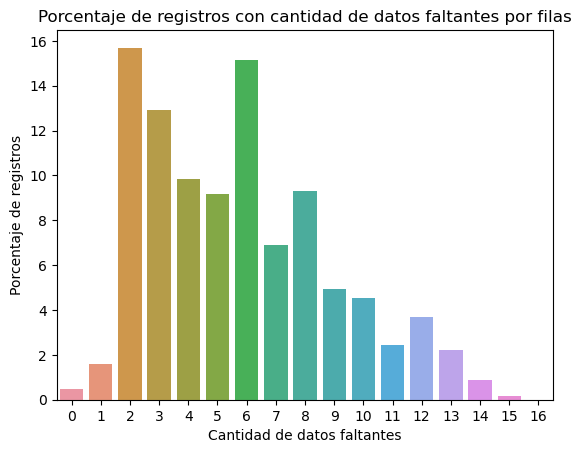

In [11]:
# Lo graficamos
sns.barplot(x=missing_by_row.index, y=missing_by_row.values) #grafico de barras
plt.title("Porcentaje de registros con cantidad de datos faltantes por filas")
plt.xlabel("Cantidad de datos faltantes")
plt.ylabel("Porcentaje de registros")
plt.show()

### Análisis de datos faltantes

In [15]:
#creamos un nuevo dataframe con la suma de todos los registros nan por columna y el % que representan en forma decreciente
missing_data = data.isna().sum(axis=0)
missing_data_df = pd.DataFrame(missing_data, columns=['total_nan'])
missing_data_df['perc_%'] = (missing_data_df / data.shape[0]).round(2)*100
missing_data_df.sort_values(ascending=False, by='total_nan')

,total_nan,perc_%
floor,113321,93.0
expenses,106958,88.0
rooms,73830,61.0
price_usd_per_m2,52603,43.0
lat-lon,51550,43.0
lat,51550,43.0
lon,51550,43.0
surface_total_in_m2,39328,32.0
price_per_m2,33562,28.0
currency,20411,17.0


### Dispersión de datos

In [16]:
data_dispersion = data.apply(lambda x: x.unique().size)
data_dispersion_df = pd.DataFrame(data_dispersion, columns=['count'])
data_dispersion_df["perc"] = (data_dispersion / data.shape[0]).round(2)*100
data_dispersion_df.sort_values(ascending=True, by='count')

,count,perc
operation,1,0.0
country_name,1,0.0
property_type,4,0.0
currency,5,0.0
state_name,28,0.0
rooms,32,0.0
floor,183,0.0
geonames_id,647,1.0
expenses,983,1.0
surface_covered_in_m2,996,1.0


In [ ]:
for col in data.columns:
    if(data[col].nunique() < 100):
        print(col)
        print(data[col].unique())
        print()

### Analisis de correlacion entre columnas

In [ ]:
# Identificamos si existe una correlacion entre variables
corr = data.set_index('place_name').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

#Hay una alta correlacion entre price y price_per_m2, price_aprox_local_currency, price_aprox_usd: price está en dolares/pesos argentinos y local currency 
# en pesos, podría deberse al tipo de cambio utilizado.

## Exploración del dataset dividido en grupos de Properatti 

Para los siguientes pasos trabajaremos con el dataset dividido en tres grandes grupos:
-  Localización: que contiene las columnas relacionadas con la ubicación del inmueble y a su vez este dividido en dos subgrupos:
    - Ubicación: que contiene las columnas place_name, state_name, country_name y place_with_parent_names, es decir columnas con la localización política del inmueble.
    - Georeferenciada: que contiene las columnas geonames_id, lat y lon, es decir columnas con la localización geográfica del inmueble.
- Precio: que contiene las columnas relacionadas a los precios en distintas variantes. 
- Superficie: que contiene las columnas relacionadas con la superficie del inmueble

In [17]:
# Definimos 4 grupos de variables para poder trabajar con ellas de forma mas sencilla
places = ['place_name','place_with_parent_names', 'country_name','state_name']
geolocation = ['geonames_id', 'lat-lon','lat','lon']
price = ['price','currency','price_aprox_local_currency','price_aprox_usd','price_usd_per_m2','price_per_m2']
surface = ['surface_total_in_m2','surface_covered_in_m2']

### Localización por ubicación política

Exploración de las variables relacionadas con la ubicación: Por Provincia, Ciudad/Barrio, el conjunto de ubicación 
- country_name
- state_name 
- place_name                        
- place_with_parent_names              

vamos a:

- Explorar las variables 
- Visualizar los nan de estas columnas
- Relacionar las columnas country_name, state_name, place_name con la concatenación de ubicación en place_with_parent_names para ver si efectivamente corresponden o hay datos mal cargados

In [18]:
#Exploramos el conjunto total y las variables 
# Creamos un nuevo dataframe con las columnas que nos interesan
location_data = data[places].copy()
location_data.head()

,place_name,place_with_parent_names,country_name,state_name
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal
1,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal
3,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal
4,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica


In [19]:
places_data = data[places].copy()   #asignamos el dataframe a una variable que utilizaremos en adelante
places_data.head()

,place_name,place_with_parent_names,country_name,state_name
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal
1,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal
3,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal
4,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica


In [ ]:
places_data.sample(10)

In [20]:
#Vemos más a detalle por variable los registros totales, los registros unicos, el dato más frecuente y su frecuencia
#Vemos que state_name contiene más de las 23 provincias que deberia tener Argentina:posiblemente estén datos diferentes a provincias
places_data[places].describe()

,place_name,place_with_parent_names,country_name,state_name
count,121197,121220,121220,121220
unique,1060,1164,1,28
top,Córdoba,|Argentina|Santa Fe|Rosario|,Argentina,Capital Federal
freq,9254,8504,121220,32316


In [21]:
#ubicación "State_name" ¿por provincia?
#vamos a ver un poco más cuales son los valores unicos de state_name que deberian relacionarse al nombre de las provincias
places_data["state_name"].value_counts() #Excludes NA values by default.

#efectivamente state_name si contiene las 23 provincias argentinas, sin embargo, divide a Buenos Aires en la capital federal
# y el gran buenos aires más la costa atlantica 
# observamos que los datos están concentrados en Buenos Aires (Cap fed, zona norte, zona sur, oeste, atlántica, interior),
#  Cordoba, Santa fe 

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [22]:
# ubicación por place_name ¿ciudad-municipio o barrio?
places_data["place_name"].value_counts().head(20)
# NOtamos que existe una mexcla entre ciudades,municipios y barrios.
# Tigre es una ciudad al norte de la ciudad de Buenos Aires.
# Nordelta es una localidad urbana en el Partido de Tigre, Provincia de Buenos Aires 
## esta columna mezcla ciudades y barrios
# Capital Federal está como place_name 

Córdoba            9254
Rosario            8504
Mar del Plata      6534
Tigre              3324
Nordelta           3315
Belgrano           2992
Palermo            2885
La Plata           2534
Caballito          2273
Pilar              2228
Villa Urquiza      1632
Olivos             1590
Recoleta           1547
Lomas de Zamora    1529
Flores             1354
Ituzaingó          1340
Villa Crespo       1331
Capital Federal    1297
San Telmo          1216
Morón              1209
Name: place_name, dtype: int64

In [23]:
#nVemos algunos registros de place_with_parent_names
places_data["place_with_parent_names"].value_counts().head(10) 

# La variable representa el país/ "country_name", la provincia/ "state_name" (o division de la provincia), la ciudad principal/partido-municipio o barrio
# en el caso de capital federal"place_name"
# y un adicional que puede ser una localidad del partido (ejem: |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|*Nordelta*|)
# los registros tienen entre 2  y 4 concatenaciones: 2 concatenaciones solo muestra hasta la ubicación por provincia, no brinda información relevante
### |Argentina|Capital Federal|  1297 no tiene nombre de barrio, desestimar o completar? 
### |Argentina|Córdoba|    2648no tiene nombre de barrio, desestimar o completar? 
# esta variable puede usarse para completar los datos faltantes de place_name 
# podemos chequear si el atributo "place_name" coincide con los datos aquí plasmados

|Argentina|Santa Fe|Rosario|                              8504
|Argentina|Córdoba|Córdoba|                               6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|    6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|       3315
|Argentina|Capital Federal|Belgrano|                      2992
|Argentina|Capital Federal|Palermo|                       2885
|Argentina|Córdoba|                                       2648
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|                2359
|Argentina|Capital Federal|Caballito|                     2273
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|                1857
Name: place_with_parent_names, dtype: int64

In [24]:
# Para state_name vemos: cuales son los datos de place_name más frecuente, su frecuencia y cuantos registros diferentes existen 
places_data.groupby(["state_name"])["place_name"].describe()

# La variable place_name está representado principalmente por una ciudad-municipio de la provincia o division de esta

,count,unique,top,freq
state_name,,,,
Bs.As. G.B.A. Zona Norte,25537,264,Tigre,3324
Bs.As. G.B.A. Zona Oeste,9322,78,Morón,1209
Bs.As. G.B.A. Zona Sur,13952,123,La Plata,2534
Buenos Aires Costa Atlántica,10006,87,Mar del Plata,6534
Buenos Aires Interior,2291,99,Bahía Blanca,480
Capital Federal,32316,62,Belgrano,2992
Catamarca,27,6,Manantiales,17
Chaco,57,7,Resistencia,37
Chubut,259,16,Cushamen,100


## Verificar la calidad de los datos:


### Ubicación

Para verificar la calidad de los datos, principalmente, vamos a comparar las columnas que deberían tener la misma información y ver si coinciden o no. Por ejemplo, la columna "place_with_parent_names" debería contener dentro de su array la misma información que "place_name". Vamos a verificar si esto es cierto o no.

#### Corroborar si place_with_parent_names coincide con country_name, state_name, place_name 

In [25]:
# Convertimos la columna place_with_parent_names en una lista usando el separador "|"
# Eliminamos el separador inicial y final de la lista
places_data['place_with_parent_names'] = places_data['place_with_parent_names'].apply(lambda x: x.lstrip("|").rstrip("|").split("|"))
places_data['place_with_parent_names'].head()

0              [Argentina, Capital Federal, Mataderos]
1        [Argentina, Bs.As. G.B.A. Zona Sur, La Plata]
2              [Argentina, Capital Federal, Mataderos]
3                [Argentina, Capital Federal, Liniers]
4    [Argentina, Buenos Aires Costa Atlántica, Mar ...
Name: place_with_parent_names, dtype: object

In [26]:
# Función para chequear si los valores de la columna place_with_parent_names coinciden exactamente con 
# los valores de las columnas country_name, state_name, place_name
# Coincidir exactamente significa que la columna place_with_parent_names sólo tiene 3 elementos 
# y que los valores de los elementos coinciden en orden con los valores de las columnas country_name, state_name, place_name

def is_location_different(row):
    # la lista debería tener 3 elementos
    if len(row['place_with_parent_names']) != 3:
        return True
    if row['country_name'] == row['place_with_parent_names'][0] \
    and row['state_name'] == row['place_with_parent_names'][1] \
    and row['place_name'] == row['place_with_parent_names'][2]:
        return False
    else:
        return True

In [27]:
# Creamos la mascara utilizando la función is_location_different
mask = places_data.apply(lambda x: is_location_different(x), axis=1)
print("place_with_parent_names difference with country_name, state_name and place_name:", places_data[mask].shape[0])
places_data[mask][places].sample(10)

place_with_parent_names difference with country_name, state_name and place_name: 45220


,place_name,place_with_parent_names,country_name,state_name
105338,City Bell,"[Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ...",Argentina,Bs.As. G.B.A. Zona Sur
104694,City Bell,"[Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ...",Argentina,Bs.As. G.B.A. Zona Sur
83810,Villa Lynch,"[Argentina, Bs.As. G.B.A. Zona Norte, General ...",Argentina,Bs.As. G.B.A. Zona Norte
43940,Bernal,"[Argentina, Bs.As. G.B.A. Zona Sur, Quilmes, B...",Argentina,Bs.As. G.B.A. Zona Sur
85087,Vicente López,"[Argentina, Bs.As. G.B.A. Zona Norte, Vicente ...",Argentina,Bs.As. G.B.A. Zona Norte
93332,Playa Chica,"[Argentina, Buenos Aires Costa Atlántica, Mar ...",Argentina,Buenos Aires Costa Atlántica
8901,Acassuso,"[Argentina, Bs.As. G.B.A. Zona Norte, San Isid...",Argentina,Bs.As. G.B.A. Zona Norte
42494,Haras del Pilar - Las Praderas 1 y 2,"[Argentina, Bs.As. G.B.A. Zona Norte, Pilar, H...",Argentina,Bs.As. G.B.A. Zona Norte
56357,Ciudadela,"[Argentina, Bs.As. G.B.A. Zona Oeste, Tres de ...",Argentina,Bs.As. G.B.A. Zona Oeste
611,Barrio San Matías,"[Argentina, Bs.As. G.B.A. Zona Norte, Escobar,...",Argentina,Bs.As. G.B.A. Zona Norte


*Conclusión: Existen 45220 registros que no coinciden exactamente.* 

#### Análisis de los registros que no coinciden exactamente en las columnas places
___

Veamos cuáles son los registros que no coinciden exactamente en las columnas places

In [28]:
# Contamos la cantidad de valores de cada array de place_with_parent_names
destructured_places_with_parent_names_rows =  places_data['place_with_parent_names'].apply(lambda x: len(x)).value_counts()
destructured_places_with_parent_names_rows
#Este código nos devuelve la cantidad de filas que tenemos agrupadas en place_with_parent_names: va de dos a cinco especificaciones
#para la ubicacion de un inmueble; hasta donde conociamos veniamos viendo hasta 3: Pais|Provincia|Ciudad o Barrio.
# veremos que descripcion adicional nos brinda las concatenaciones >3.

3    76023
4    39869
2     4780
5      548
Name: place_with_parent_names, dtype: int64

In [29]:
#Vemos el porcentaje para graficarlo luego
destructured_places_with_parent_names_rows_percent =  places_data['place_with_parent_names'].apply(lambda x: len(x)).value_counts(normalize=True) * 100
destructured_places_with_parent_names_rows_percent

3    62.714899
4    32.889787
2     3.943244
5     0.452071
Name: place_with_parent_names, dtype: float64

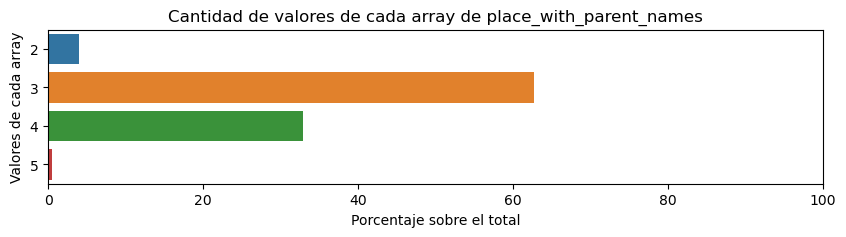

In [30]:
#representamos la cantidad de grupo de datos contenidos en la variable place_with_parent_names
fig, ax = plt.subplots(figsize=(10,2))
sns.barplot(x=destructured_places_with_parent_names_rows_percent.values,y=destructured_places_with_parent_names_rows_percent.index, orient='h', ax=ax, ) 
ax.set_title('Cantidad de valores de cada array de place_with_parent_names') 
ax.set_xlabel('Porcentaje sobre el total') 
ax.set_ylabel('Valores de cada array')
plt.xlim(0,100)
plt.show()


De los pasos anteriores notamos: los registros que no coinciden exactamente son aquellas listas que no tienen 3 valores. De todas maneras tanto aquellos que tiene 2 como los que tienen 5 valores no tienen una cantidad significativa de registros. 

Revisamos que los valores que están en cada lista tengan su contraparte en las otras columnas aunque figuren en otro orden del array. Por ejemplo, si en place_with_parent_names figura "Argentina|Capital Federal|Palermo" y en place_name figura "Capital Federal", entonces el registro para este momento del análisis se considera válido.

In [31]:
# country_name
print("null values:", places_data['country_name'].isna().sum())
mask = ~places_data.apply(lambda x: x['country_name'] in x['place_with_parent_names'], axis=1)
print("place_with_parent_names difference with country_name:", places_data[mask].shape[0])

null values: 0
place_with_parent_names difference with country_name: 0


In [32]:
# state_name
print("null values:", places_data['state_name'].isna().sum())
mask = ~places_data.apply(lambda x: x['state_name'] in x['place_with_parent_names'], axis=1)
print("place_with_parent_names difference with state_name:", places_data[mask].shape[0])

null values: 0
place_with_parent_names difference with state_name: 0


In [33]:
# place_name
print("null values:", places_data['place_name'].isna().sum())
mask = ~places_data.apply(lambda x: x['place_name'] in x['place_with_parent_names'], axis=1)
print("place_with_parent_names difference with place_name:", places_data[mask].shape[0])


null values: 23
place_with_parent_names difference with place_name: 23


*Conclusión: La información que figura en las columnas place_name, country_name y state_name se encuentra en la columna place_with_parent_names aunque no exactamente igual (parece existir información extra) excepto en la columna 'place_name' con sus 23 NaNs que ya hemos identificado previamente.*

A continuación analizaremos esas columnas dividiendo el trabajo en partes dependiendo de la cantidad de elementos que contenga el array de la columna "place_with_parent_names".

#### Análisis de registros de place_with_parent_names con 3 valores
___

In [40]:
# Revisamos los place_with_parent_names con tres elementos
mask = places_data['place_with_parent_names'].apply(lambda x: len(x) == 3)
places_data_3_elements = places_data[mask].copy()
places_data_3_elements.shape

(76023, 4)

In [35]:
# Corroboramos que los valores de country_name, state_name y place_name coinciden con los valores de place_with_parent_names
print("country_name difference with place_with_parent_names[0]:", places_data_3_elements[places_data_3_elements['country_name'] != places_data_3_elements['place_with_parent_names'].apply(lambda x: x[0])].shape[0])
print("state_name difference with place_with_parent_names[1]:", places_data_3_elements[places_data_3_elements['state_name'] != places_data_3_elements['place_with_parent_names'].apply(lambda x: x[1])].shape[0])
print("place_name difference with place_with_parent_names[2]:", places_data_3_elements[places_data_3_elements['place_name'] != places_data_3_elements['place_with_parent_names'].apply(lambda x: x[2])].shape[0])

country_name difference with place_with_parent_names[0]: 0
state_name difference with place_with_parent_names[1]: 0
place_name difference with place_with_parent_names[2]: 23


In [36]:
# Vemos los datos correspondientes a los valores nulos de la columna place_name
mask = ~places_data.apply(lambda x: x['place_name'] in x['place_with_parent_names'], axis=1)
places_data_place_name_nan = places_data[mask].copy()
places_data_place_name_nan.head()

,place_name,place_with_parent_names,country_name,state_name
6489,NaN,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre]",Argentina,Bs.As. G.B.A. Zona Norte
10201,NaN,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre]",Argentina,Bs.As. G.B.A. Zona Norte
11451,NaN,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre]",Argentina,Bs.As. G.B.A. Zona Norte
14839,NaN,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre]",Argentina,Bs.As. G.B.A. Zona Norte
18622,NaN,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre]",Argentina,Bs.As. G.B.A. Zona Norte


In [37]:
#Extraemos el dato en la posicion que corresponde a Tigre y lo contabilizamos 
places_data_place_name_nan['place_with_parent_names'].apply(lambda x: x[2]).value_counts()

Tigre    23
Name: place_with_parent_names, dtype: int64

*Conclusión: Los registros que no tienen valor en place_name son los que no coinciden, todos del municipio de Tigre. El resto de los valores son exactamente iguales*  





#### Análisis de registros de place_with_parent_names con 4 valores
___

In [41]:
# Revisamos los place_with_parent_names con cuatro elementos
mask = places_data['place_with_parent_names'].apply(lambda x: len(x) == 4)
places_data_4_elements = places_data[mask].copy()
places_data_4_elements.shape


(39869, 4)

In [42]:
# Contamos los valores de la columna place_with_parent_names por el segundo elemento (descartamos el primero
#  porque sabemos que siempre es Argentina)
places_data_4_elements['place_with_parent_names'].apply(lambda x: x[1]).value_counts()


Bs.As. G.B.A. Zona Norte        17198
Bs.As. G.B.A. Zona Sur          11638
Bs.As. G.B.A. Zona Oeste         7058
Capital Federal                  1198
Buenos Aires Costa Atlántica     1177
Buenos Aires Interior             962
Río Negro                         638
Name: place_with_parent_names, dtype: int64

In [43]:
# Confirmamos que los valores de la columna place_with_parent_names[1] coinciden con los valores de la columna state_name
mask = (places_data_4_elements['place_with_parent_names'].apply(lambda x: x[1]) != places_data_4_elements['state_name'])
print("place_with_parent_names[1] difference with state_name:", places_data_4_elements[mask].shape[0])


place_with_parent_names[1] difference with state_name: 0


In [44]:
# Confirmamos que los valores de la columna place_with_parent_names[2] coinciden con los valores de la columna place_name
mask = places_data_4_elements['place_with_parent_names'].apply(lambda x: x[2]) != places_data_4_elements['place_name']
print("place_with_parent_names[2] difference with place_name:", places_data_4_elements[mask].shape[0])
print("place_with_parent_names[2] proportional difference with place_name:", places_data_4_elements[mask].shape[0] / places_data_4_elements.shape[0])
places_data_4_elements_non_matching = places_data_4_elements[mask].copy()
places_data_4_elements_non_matching[places].sample(10)

place_with_parent_names[2] difference with place_name: 29842
place_with_parent_names[2] proportional difference with place_name: 0.7485013418947052


,place_name,place_with_parent_names,country_name,state_name
40003,La Perla,"[Argentina, Buenos Aires Costa Atlántica, Mar ...",Argentina,Buenos Aires Costa Atlántica
25348,Glew,"[Argentina, Bs.As. G.B.A. Zona Sur, Almirante ...",Argentina,Bs.As. G.B.A. Zona Sur
50772,Ramos Mejía,"[Argentina, Bs.As. G.B.A. Zona Oeste, La Matan...",Argentina,Bs.As. G.B.A. Zona Oeste
20226,Remedios de Escalada,"[Argentina, Bs.As. G.B.A. Zona Sur, Lanús, Rem...",Argentina,Bs.As. G.B.A. Zona Sur
42616,Bernal,"[Argentina, Bs.As. G.B.A. Zona Sur, Quilmes, B...",Argentina,Bs.As. G.B.A. Zona Sur
69368,Adrogué,"[Argentina, Bs.As. G.B.A. Zona Sur, Almirante ...",Argentina,Bs.As. G.B.A. Zona Sur
42811,Ingeniero Pablo Nogués,"[Argentina, Bs.As. G.B.A. Zona Norte, Malvinas...",Argentina,Bs.As. G.B.A. Zona Norte
77968,Palermo Hollywood,"[Argentina, Capital Federal, Palermo, Palermo ...",Argentina,Capital Federal
14241,San Martín,"[Argentina, Bs.As. G.B.A. Zona Norte, General ...",Argentina,Bs.As. G.B.A. Zona Norte
70677,Adrogué,"[Argentina, Bs.As. G.B.A. Zona Sur, Almirante ...",Argentina,Bs.As. G.B.A. Zona Sur


In [45]:
# No coinciden en 29842 registros pero coinciden en el resto. 
# Confirmamos que los que coinciden son iguales al valor[3] en la cadena completa
mask = places_data_4_elements_non_matching['place_with_parent_names'].apply(lambda x: x[2]) == places_data_4_elements_non_matching['place_with_parent_names'].apply(lambda x: x[3])
places_data_4_elements_non_matching[mask].shape[0]/ places_data_4_elements_non_matching.shape[0]

0.0

In [46]:
# Confirmamos que los valores de la columna place_with_parent_names[3] coinciden con los valores de la columna place_name
mask = (places_data_4_elements['place_with_parent_names'].apply(lambda x: x[3]) != places_data_4_elements['place_name'])
print("place_with_parent_names[3] difference with place_name:", places_data_4_elements[mask].shape[0])
anti_mask = ~mask # Los que coinciden
places_data_4_elements[anti_mask][places].sample(10)

place_with_parent_names[3] difference with place_name: 0


,place_name,place_with_parent_names,country_name,state_name
71516,Lomas de Zamora,"[Argentina, Bs.As. G.B.A. Zona Sur, Lomas de Z...",Argentina,Bs.As. G.B.A. Zona Sur
59556,La Plata,"[Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ...",Argentina,Bs.As. G.B.A. Zona Sur
33702,Longchamps,"[Argentina, Bs.As. G.B.A. Zona Sur, Almirante ...",Argentina,Bs.As. G.B.A. Zona Sur
85660,Olivos,"[Argentina, Bs.As. G.B.A. Zona Norte, Vicente ...",Argentina,Bs.As. G.B.A. Zona Norte
46234,Tigre,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre, T...",Argentina,Bs.As. G.B.A. Zona Norte
4625,Wilde,"[Argentina, Bs.As. G.B.A. Zona Sur, Avellaneda...",Argentina,Bs.As. G.B.A. Zona Sur
93267,Stella Maris,"[Argentina, Buenos Aires Costa Atlántica, Mar ...",Argentina,Buenos Aires Costa Atlántica
45977,Glew,"[Argentina, Bs.As. G.B.A. Zona Sur, Almirante ...",Argentina,Bs.As. G.B.A. Zona Sur
56423,Torreón,"[Argentina, Buenos Aires Costa Atlántica, Mar ...",Argentina,Buenos Aires Costa Atlántica
68217,Burzaco,"[Argentina, Bs.As. G.B.A. Zona Sur, Almirante ...",Argentina,Bs.As. G.B.A. Zona Sur


*Conclusión: De los 39869 registros con 4 valores, 29842 toman el valor de place_name del 4to valor de la lista. Los 10027 restantes toman el 3er valor.* que es siempre un barrio/localidad dentro del municipio: ejm: Glew localidad del municipio Almiramte Brown de zona sur del Gran Buenos Aires.

- place_name asignado a 3er valor de "place_with_parent_names": 10027
- place_name asignado a 4to valor de "place_with_parent_names": 29842

#### Análisis de registros de place_with_parent_names con 2 valores
___

In [47]:
# Reviso los place_with_parent_names con dos elementos
mask = places_data['place_with_parent_names'].apply(lambda x: len(x) == 2)
places_data_2_elements = places_data[mask].copy()
places_data_2_elements['place_with_parent_names'].value_counts()

[Argentina, Córdoba]                         2648
[Argentina, Capital Federal]                 1297
[Argentina, Bs.As. G.B.A. Zona Norte]         222
[Argentina, Mendoza]                          130
[Argentina, Buenos Aires Interior]            106
[Argentina, Tucumán]                           77
[Argentina, Bs.As. G.B.A. Zona Oeste]          65
[Argentina, Misiones]                          44
[Argentina, Santa Fe]                          33
[Argentina, Buenos Aires Costa Atlántica]      27
[Argentina, San Luis]                          24
[Argentina, Bs.As. G.B.A. Zona Sur]            24
[Argentina, Salta]                             21
[Argentina, Chubut]                            17
[Argentina, Neuquén]                           10
[Argentina, Río Negro]                          8
[Argentina, San Juan]                           7
[Argentina, Tierra Del Fuego]                   6
[Argentina, Catamarca]                          3
[Argentina, Santiago Del Estero]                3


In [48]:
# Reviso los place_with_parent_names de Córdoba y Capital Federal por contener el maypr numero de registros
mask = places_data_2_elements['place_with_parent_names'].apply(lambda x: x[1] == 'Córdoba' or x[1] == 'Capital Federal')
places_data_2_elements[mask].sample(10)

,place_name,place_with_parent_names,country_name,state_name
70147,Córdoba,"[Argentina, Córdoba]",Argentina,Córdoba
67176,Córdoba,"[Argentina, Córdoba]",Argentina,Córdoba
90240,Córdoba,"[Argentina, Córdoba]",Argentina,Córdoba
12896,Capital Federal,"[Argentina, Capital Federal]",Argentina,Capital Federal
78469,Córdoba,"[Argentina, Córdoba]",Argentina,Córdoba
18741,Capital Federal,"[Argentina, Capital Federal]",Argentina,Capital Federal
79926,Capital Federal,"[Argentina, Capital Federal]",Argentina,Capital Federal
54646,Capital Federal,"[Argentina, Capital Federal]",Argentina,Capital Federal
66983,Córdoba,"[Argentina, Córdoba]",Argentina,Córdoba
92254,Córdoba,"[Argentina, Córdoba]",Argentina,Córdoba


In [49]:
# Pareciera ser que todos los lugares que tienen dos elementos en place_with_parent_names repiten el nombre del estado en place_name
# Corroboramos esto
mask = places_data_2_elements['place_name'] != places_data_2_elements['state_name']
places_data_2_elements[mask].shape


(0, 4)

*Conclusión: En los 4780 registros de place_with_parent_names que tienen 2 valores se utilizó state_name como place_name.* 
*Es decir, la ciudad principal de la provincia.*

#### Análisis de registros de place_with_parent_names con 5 valores
___

In [55]:
# Reviso los place_with_parent_names con 5 elementos
mask = places_data['place_with_parent_names'].apply(lambda x: len(x) == 5)
places_data_5_elements = places_data[mask].copy()
print(places_data_5_elements['place_with_parent_names'].shape)
places_data_5_elements.sample(5)

(548,)


,place_name,place_with_parent_names,country_name,state_name
46375,Barrio Los Alisos,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre, N...",Argentina,Bs.As. G.B.A. Zona Norte
118210,Barrio Los Lagos,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre, N...",Argentina,Bs.As. G.B.A. Zona Norte
22901,Barrio Los Alisos,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre, N...",Argentina,Bs.As. G.B.A. Zona Norte
114425,Barrio La Alameda,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre, N...",Argentina,Bs.As. G.B.A. Zona Norte
35760,Barrio Los Alisos,"[Argentina, Bs.As. G.B.A. Zona Norte, Tigre, N...",Argentina,Bs.As. G.B.A. Zona Norte


In [54]:
# Reviso si alguno de los valores no corresponde a Nordelta
places_data_5_elements['place_with_parent_names'].apply(lambda x: x[3] != 'Nordelta').sum()

0

In [56]:
# Corroboramos que los valores de la columna place_with_parent_names[2] coinciden con los valores de la columna place_name
mask = (places_data_5_elements['place_with_parent_names'].apply(lambda x: x[2]) != places_data_5_elements['place_name'])
print("place_with_parent_names[2] difference with place_name:", places_data_5_elements[mask].shape[0])
print("place_with_parent_names[2] proportional difference with place_name:", places_data_5_elements[mask].shape[0] / places_data_5_elements.shape[0])


place_with_parent_names[2] difference with place_name: 548
place_with_parent_names[2] proportional difference with place_name: 1.0


In [57]:
# Corroboramos que los valores de la columna place_with_parent_names[3] coinciden con los valores de la columna place_name
mask = (places_data_5_elements['place_with_parent_names'].apply(lambda x: x[3]) != places_data_5_elements['place_name'])
print("place_with_parent_names[3] difference with place_name:", places_data_5_elements[mask].shape[0])
print("place_with_parent_names[3] proportional difference with place_name:", places_data_5_elements[mask].shape[0] / places_data_5_elements.shape[0])


place_with_parent_names[3] difference with place_name: 548
place_with_parent_names[3] proportional difference with place_name: 1.0


In [58]:
# Corroboramos que los valores de la columna place_with_parent_names[4] coinciden con los valores de la columna place_name
mask = (places_data_5_elements['place_with_parent_names'].apply(lambda x: x[4]) != places_data_5_elements['place_name'])
print("place_with_parent_names[4] difference with place_name:", places_data_5_elements[mask].shape[0])
print("place_with_parent_names[4] proportional difference with place_name:", places_data_5_elements[mask].shape[0] / places_data_5_elements.shape[0])

place_with_parent_names[4] difference with place_name: 0
place_with_parent_names[4] proportional difference with place_name: 0.0


*Conclusión: Los 548 registros de place_with_parent_names que tienen 5 valores son de Nordelta y el último valor se refiere al Barrio. place_name toma los valores del barrio*


> ##### Conclusiones finales: 
> - Existen como máximo 5 tipos de registros en place_with_parent_names: País, Provincia, Municipio, Ciudad, Barrio
> - País y Provincia son iguales a country_name y state_name
> - Place_name se le asigna el valor de municipio: 76000 + 10027 = 86027
> - Place_name se le asigna el valor de ciudad: 29842 (en  estos casos existe el valor municipio también )
> - Place_name se le asigna el valor de barrio: 548 (en estos casos existe el valor municipio y ciudad también)
> - Place_name se le asigna el valor de state_name: 4780 (en estos casos no existe el valor municipio y ciudad)
> - Place_name se le asigna el valor de NaN: 23 (en estos casos existe el valor municipio y ciudad)
> ___
> Por lo tanto se puede concluir que para dar mayor consistencia es posible imputar place_name con el valor del municipio en las mayoría de los casos. Confrontar con geoNamesId.
> ___








### Geolocalización

In [ ]:
# Creamos un nuevo dataframe con las columnas que me interesan
geo_location_data = data[ geolocation].copy()
geo_location_data.head()

Analizamos por lat-lon para si había duplicados considerando que las mismas coordenadas son las misma propiedad.

No es posible determinar si es la misma propiedad porque lat-lon se refiere muchas veces a la ubicación aproximada. 


In [ ]:
## ver datos duplicados
data_copy = data.copy()
data_copy.dropna(subset=['lat-lon'], inplace=True)
data_copy_group = data_copy.groupby('lat-lon').count()
data_copy_group[data_copy_group['operation'] > 1].sort_values(by='operation', ascending=False)

In [ ]:
## ver si existe algun dato duplicado
data.duplicated().any()

In [ ]:
data['lat-lon'].duplicated().any()

In [ ]:
data_copy.shape

In [ ]:
data_copy[data_copy['lat-lon'] == '-34.4026444,-58.6684776']

In [ ]:
geo_location_data.sample(10)

In [ ]:
# Vemos porcentaje de valores nulos por columna
geo_location_data.isnull().sum()/geo_location_data.shape[0] * 100


In [ ]:
# convertimos el dataframe a geodataframe
geo_location_data_gdf = gpd.GeoDataFrame(geo_location_data, geometry=gpd.points_from_xy(geo_location_data.lon, geo_location_data.lat))

# Ubicamos los puntos en el mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
latin_america = world[world['continent'] == 'South America']
fig, ax = plt.subplots(figsize=(5,10))
latin_america.plot(ax=ax, alpha=0.4, color='grey', edgecolor='black')
geo_location_data_gdf.plot(ax=ax, markersize=0.5, color='red')

In [ ]:
# Existe una propiedad que se encuentra fuera de la Argentina (en Colombia). 
# La buscamos en el dataframe original
# buscamos el polígono de Colombia
geo_colombia = world[world['name'] == 'Colombia']

# Buscamos la propiedad que se encuentra en Colombia
geo_outlier_index = geo_location_data_gdf[geo_location_data_gdf.within(geo_colombia['geometry'].iloc[0])].index

# La buscamos en el dataframe original
data.iloc[geo_outlier_index]


Es una propiedad súper interesante, por latitud y longitud está en Colombia, pero por el nombre de la provincia está en Argentina, la descripción habla de Armenia y el título del el Barrio el Limonar.

En una rápida búsqueda por internet encontramos que la propiedad se encuentra en el barrio El Limonar de Armenia, Colombia.

La descartaremos sin dudas.

______

#### Corroborar si lat-lon coincide con las columnas lat y lon

In [ ]:
# Corroboremos que los valores nulos en lat-lon son los mismos que en lat y lon
geo_location_data[geo_location_data['lat-lon'].isnull()]['lat'].isnull().sum() == geo_location_data[geo_location_data['lat-lon'].isnull()]['lon'].isnull().sum()


In [ ]:
# Dropeamos los valores nulos de lat-lon
geo_location_data.dropna(subset=['lat-lon'], inplace=True)
geo_location_data.isnull().sum()

In [ ]:
# Convertimos la columna lat-lon en dos columnas nuevas
geo_location_data['lat_alt'] = geo_location_data['lat-lon'].apply(lambda x: x.split(',')[0])
geo_location_data['lon_alt'] = geo_location_data['lat-lon'].apply(lambda x: x.split(',')[1])
geo_location_data.head()


In [ ]:
# Vemos los tipos de datos
geo_location_data.dtypes

In [ ]:
# convertimos las nuevas columnas a float
geo_location_data['lat_alt'] = geo_location_data['lat_alt'].astype(float)
geo_location_data['lon_alt'] = geo_location_data['lon_alt'].astype(float)
geo_location_data.dtypes

In [ ]:
# Comprobamos que los valores de las nuevas columnas son iguales a los de las columnas originales
print("Diferencia entre lat:",(geo_location_data['lat_alt'] != geo_location_data['lat']).sum())
print("Diferencia entre lon:",(geo_location_data['lon_alt'] != geo_location_data['lon']).sum())
# En proporción
print("Diferencia en proporción de lat",(geo_location_data['lat_alt'] != geo_location_data['lat']).sum()/ geo_location_data.shape[0])
print("Diferencia en proporción de lon",(geo_location_data['lon_alt'] != geo_location_data['lon']).sum()/ geo_location_data.shape[0])


Hay diferencias en 21% los casos. Veamos si es una diferencia significativa

Revisamos el margen de diferencia redondeando progresivamente.

In [ ]:
Decimal(geo_location_data['lon'][0]).as_tuple().exponent

In [ ]:
# Reviso la cantidad de decimales que tienen los valores de lat y lon
geo_location_data['lat'].apply(lambda x: Decimal(x).as_tuple().exponent).value_counts()

In [ ]:
geo_location_data['lon'].apply(lambda x: Decimal(x).as_tuple().exponent).value_counts()

In [ ]:
# Vamos redondeando progresivamente los valores de lat y lon
lat_decimal_diff = []
for i in range(47,0,-1):
    margin = (geo_location_data['lat_alt'].round(i) != geo_location_data['lat'].round(i)).sum()/ geo_location_data.shape[0]
    lat_decimal_diff.insert(0,margin)
    # print('Margen de diferencia de',i,'decimales en latitud:', margin)
# Buscamos dónde el margen de diferencia es menor al 1%
    if margin <= 0.01:
        print('Margen de diferencia de',i,'decimales en latitud:', margin)
   
print("////////////////////////////////////")   

lon_decimal_diff = []
for i in range(47,0,-1):
    margin = (geo_location_data['lon_alt'].round(i) != geo_location_data['lon'].round(i)).sum()/ geo_location_data.shape[0]
    lon_decimal_diff.insert(0,margin)
    # print('Margen de diferencia de',i,'decimales en longitud:', margin)
# Buscamos dónde el margen de diferencia es menor al 1%
    if margin <= 0.01:
        print('Margen de diferencia de',i,'decimales en latitud:', margin)




In [ ]:
# Lo graficamos
plt.figure(figsize=(10,5))
plt.plot(lat_decimal_diff, label='latitud')
plt.plot(lon_decimal_diff, label='longitud')
plt.ylabel('Margen de diferencia')
plt.xlabel('Cantidad de decimales')
plt.legend()


In [ ]:
geo_location_data_gdf = gpd.GeoDataFrame(geo_location_data, geometry=gpd.points_from_xy(geo_location_data.lon, geo_location_data.lat))
geo_location_data_gdf.head()


> Como se puede ver, las diferencias entre lat-lon y lat y lon comienzan a partir de los 13 decimales por lo que podemos descartarla como una diferencia significativa.
> 
> Por otro lado, también hemos comprobado que los valores de lat lon provienen de convertir la variable a geometry y obtener de ahí lat y lon
>
> Entonces podemos concluir que la variable lat-lon es redundante y podemos eliminarla.
> ____ 

#### Análisis de propiedades con igual latitud y longitud con otras propiedades

Vamos a buscar si hay muchos puntos iguales para refutar la hipótesis de que se utilizó la misma ubicación para varias propiedades

In [ ]:
# Primero veamos una visualización de los datos de Capital Federal para ver si parece haber una gran concentración 
# de propiedades en algún lugar específico o están dispersas por toda la ciudad.
geo_location_data_gdf_capital = geo_location_data_gdf[data['state_name']=='Capital Federal']
geo_location_data_gdf_capital['geometry']

In [ ]:
# Ubicamos los puntos en el mapa
df_barrios_capital = pd.read_csv('./data/barrios.csv', sep=',', encoding='latin-1')
import shapely.wkt

df_barrios_capital["WKT"] = df_barrios_capital["WKT"].apply(shapely.wkt.loads) 
df_barrios_capital = gpd.GeoDataFrame(df_barrios_capital, geometry='WKT')


In [ ]:
geo_location_data_gdf_capital['geometry']
fig, ax = plt.subplots(figsize=(10,20))

geo_location_data_gdf_capital.plot(ax=ax, markersize=0.5, color='red', alpha=0.1) 
df_barrios_capital.plot(ax=ax, alpha=0.4, color='grey', edgecolor='black')
plt.xlim(-58.55,-58.350)
plt.ylim(-34.705,-34.525) 
plt.show()

In [ ]:
# Ahora veamos en todo el dataset cuántas propiedades comparten la misma ubicación.
different_locations = geo_location_data_gdf['geometry'].value_counts()
print('Cantidad de propiedades por punto:', different_locations) 

In [ ]:
prop_qty_per_point = []
for i in range(1,different_locations[0]+1):
    (different_locations == i).sum() / different_locations.shape[0] * 100
    prop_qty_per_point.append((different_locations == i).sum() / different_locations.shape[0] * 100)
prop_qty_per_point = pd.DataFrame(prop_qty_per_point, columns=['Porcentaje'], index=range(1,different_locations[0]+1))
prop_qty_per_point.reset_index(inplace=True)
prop_qty_per_point.rename(columns={'index':'Cantidad de propiedades por punto'}, inplace=True)
prop_qty_per_point.head(10)

In [ ]:
# Lo graficamos
plt.figure(figsize=(10,5))
plt.hist(different_locations, bins=different_locations[0]+1)
plt.ylabel('Cantidad de puntos')
plt.xlabel('Cantidad de propiedades por punto')
plt.show()



Veamos dónde se encuentran las propiedades que más tienen lat y lon iguales

In [ ]:
most_shared_point_props = geo_location_data_gdf[geo_location_data_gdf['geometry'].isin(different_locations.index[0:11])]
 

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
latin_america.plot(ax=ax, alpha=0.4, color='grey', edgecolor='black')
most_shared_point_props.plot(ax=ax, markersize=0.5, color='red')

In [ ]:
# Parece que están todas en la Argentina
# Descargamos un mapa de la Argentina por municipios para averiguar qué municipios son los que tienen más propiedades en el mismo punto.
# https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG
municipios_geo = gpd.read_file('./data/municipio/municipio.shp')
municipios_geo.head()

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
municipios_geo.plot(ax=ax, alpha=0.4, color='grey', edgecolor='black')
plt.show()

In [ ]:
# Veamos en qué municipios están las propiedades que comparten el mismo punto.
# convertimos a coordenadas geográficas para poder hacer el join con el geodataframe de las propiedades.
most_shared_point_props.crs = "EPSG:4326"
most_shared_point_props = most_shared_point_props.to_crs(epsg=4326) 

In [ ]:
# Hacemos el join con el geodataframe de los municipios.
most_shared_point_props_municipios = gpd.sjoin(most_shared_point_props, municipios_geo, how="inner")
most_shared_point_props_municipios.head()

In [ ]:
most_shared_point_props_municipios['fna'].value_counts()

> Podemos concluir que la gran mayoría de los puntos de lat y lon son únicos, por lo que descartamos que sean aproximaciones.
>  
> Una excepción notable son Tigre y Capital Federal
> 
> ____

#### Corroborar si lat-lon coincide con geonames_id

In [ ]:
geo_location_data = data[ geolocation].copy()

In [ ]:
# Corroboramos que todos los nulos de latitud y longitud también son nulos en la columna geonames_id.
lat_nulls = geo_location_data[geo_location_data['lat'].isnull()]
lon_nulls = geo_location_data[geo_location_data['lon'].isnull()]
geonames_null = geo_location_data[geo_location_data['geonames_id'].isnull()]
print('Es lat null = lon null?: ', lat_nulls.equals(lon_nulls))  
print('Es lat null = geonames null?: ', lat_nulls.equals(geonames_null))  
print('Es lon null = geonames null?: ', lon_nulls.equals(geonames_null))  


In [ ]:
# Vemos cuantas columnas tienen nulos en lat (o lon, son iguales en cuanto a nulos) y no en geonames_id.
lat_nulls = geo_location_data[geo_location_data['lat'].isnull()]
lat_nulls_geonames_not_null = lat_nulls[lat_nulls['geonames_id'].notnull()]
lat_nulls_geonames_not_null.shape[0] 

In [ ]:
# Vemos cuantas columnas tienen nulos en geonames_id y no en lat (o lon, son iguales en cuanto a nulos).
geonames_null = geo_location_data[geo_location_data['geonames_id'].isnull()]
geonames_null_lat_not_null = geonames_null[geonames_null['lat'].notnull()]
geonames_null_lat_not_null.shape[0]

> Conclusión: Podemos imputar lat y lon a partir de geonames_id en 43365 casos. 
> 
> Podríamos imputar 10532 casos en geonames pero con una sóla variable de geolocalización es suficiente y usaremos lat-lon para crear geometry.
>  
> ______

##### Importar la información de geonames_id

In [ ]:
geonames = pd.read_csv("ar_copy.csv", sep='\t', header=None)

In [ ]:
#como no tengo nombres en la columnas para mejorar la extracción renombro las que me interesan
geonames.rename({0: 'geoname_oficial', 4:"lat_oficial", 5:"lon_oficial"}, axis=1, inplace=True)
geonames.head()

In [ ]:
#ahora si vamos a buscar los datos de lat y lon desde el geoname_oficial del archivo geonames de internet
#Creamos un diccionario vacío para ubicar la Latitud
lat_dict = {}

#Creamos una tupla con los pares de key y value: usando un iterador de tuplas zip donde el primer
# elemento de cada iterador pasado se empareja con el primero del segundo y asi sucesivamente
geoname_lat = zip(geonames['geoname_oficial'], geonames['lat_oficial'])

#Rellenamos el diccionario
for geoname, lat_oficial in geoname_lat:
    lat_dict[geoname] = lat_oficial

In [ ]:
#Creamos un diccionario para ubicar la Longitud
lon_dict = {}

#Creamos una tupla con los pares de key y value: usando un iterador de tuplas zip donde el primer
# elemento de cada iterador pasado se empareja con el primero del segundo y asi sucesivamente
geoname_lon = zip(geonames['geoname_oficial'], geonames['lon_oficial'])

#Rellenamos el diccionario
for geoname, lon_oficial in geoname_lon:
    lon_dict[geoname] = lon_oficial

In [ ]:
geo_location_data["lat_geoname"] = geo_location_data['geonames_id'].map(lat_dict)
geo_location_data["lon_geoname"] = geo_location_data['geonames_id'].map(lon_dict)

In [ ]:
geo_location_data.isna().sum()

##### Comparar lat-lon con lat-lon extraído de geonames_id

Esto no se puede hacer porque sólo se extrajeron los datos de geonames_id que no tenían lat-lon

In [ ]:
# comparo los datos completados con los datos originales para ver si hay diferencias
# remuevo los nan de los datos originales (porque seguro va a haber diferencias en esos datos)
geo_location_data.dropna(subset=['lat', 'lon','geonames_id', 'lat_geoname', "lon_geoname" ], inplace=True)
geo_location_data.isna().sum()  

In [ ]:
geo_location_data.shape 

In [ ]:
# comparamos las filas en común que no tienen nulos
geo_location_data['lat'] == geo_location_data['lat_geoname']
geo_location_data[geo_location_data['lat'] != geo_location_data['lat_geoname']]

In [ ]:
# Ubicamos los puntos en el mapa

# Estos df ya fueron creado y están puestos como referencia
# geo_location_data_gdf = gpd.GeoDataFrame(geo_location_data, geometry=gpd.points_from_xy(geo_location_data.lon, geo_location_data.lat))
# geo_location_data_gdf_capital = geo_location_data_gdf[data['state_name']=='Capital Federal']


geo_location_data_gdf_capital_geonames = gpd.GeoDataFrame(geo_location_data, geometry=gpd.points_from_xy(geo_location_data.lon_geoname, geo_location_data.lat_geoname))
geo_location_data_gdf_capital['geometry']
df_barrios_capital = pd.read_csv('./data/barrios.csv', sep=',', encoding='latin-1')


df_barrios_capital["WKT"] = df_barrios_capital["WKT"].apply(shapely.wkt.loads) 
df_barrios_capital = gpd.GeoDataFrame(df_barrios_capital, geometry='WKT')

geo_location_data_gdf_capital['geometry']
fig, ax = plt.subplots(figsize=(10,20))

geo_location_data_gdf_capital.plot(ax=ax, markersize=0.5, color='red', alpha=0.1) 
geo_location_data_gdf_capital_geonames.plot(ax=ax, markersize=0.5, color='blue', alpha=0.1)
df_barrios_capital.plot(ax=ax, alpha=0.4, color='grey', edgecolor='black')
plt.xlim(-58.55,-58.350)
plt.ylim(-34.705,-34.525) 
plt.show()

*Conclusión: Geonames_id marca el centro de cada uno de los barrios y no la latitud y longitud exacta de la propiedad. Por lo que deberíamos imputar lat y lon a partir de geonames_id con mucho cuidado.*

#### Corroborar si lat-lon coincide con place_name

In [ ]:
municipios_geo.head()

In [ ]:
municipios_geo_nam_geo = municipios_geo.copy()

In [ ]:
# Reemplazamos ciudades por municipios
places_data_4_elements_with_mun_as_place_name = places_data_4_elements.copy()
places_data_4_elements_with_mun_as_place_name['place_name'] = places_data_4_elements['place_with_parent_names'].apply(lambda x: x[2])
print(places_data_4_elements_with_mun_as_place_name.shape)
places_data_4_elements_with_mun_as_place_name.head()

In [ ]:
# Unimos los nuevos municipios asignados con los otro municipios
places_data_mun = pd.concat([places_data_4_elements_with_mun_as_place_name, places_data_3_elements], axis=0) 
print(places_data_mun.shape) 
places_data_mun.head() 

In [ ]:
# Unimos los municipios con su georeferencia
places_data_mun_geo = places_data_mun.join(geo_location_data)
print(places_data_mun_geo.shape)
places_data_mun_geo.head()

In [ ]:
# Lo convertimos en geo data frame
places_data_mun_geo_gdf = gpd.GeoDataFrame(places_data_mun_geo, geometry=gpd.points_from_xy(places_data_mun_geo.lon, places_data_mun_geo.lat))
places_data_mun_geo_gdf.head()

In [ ]:
# limpiamos los datos que no tienen georeferencia
places_data_mun_geo_gdf.dropna(subset=['lat', 'lon'], inplace=True)
places_data_mun_geo_gdf = places_data_mun_geo_gdf[['place_name', 'geometry','state_name']]
print(places_data_mun_geo_gdf.shape)
places_data_mun_geo_gdf.head()

In [ ]:
# convertimos a coordenadas geográficas para poder hacer el join con el geodataframe de las propiedades.
places_data_mun_geo_gdf.crs = "EPSG:4326" 
places_data_mun_geo_gdf = places_data_mun_geo_gdf.to_crs("EPSG:4326")

In [ ]:
# unimos los municipios con su georeferencia con los municipios con su georeferencia de places_data_mun_geo_gdf
common_municipios = gpd.sjoin(municipios_geo_nam_geo, places_data_mun_geo_gdf, how="inner")
common_municipios = common_municipios[['nam','fna', 'place_name','state_name', 'geometry']]
print(common_municipios.shape)
common_municipios.head()

In [ ]:
# Chequeamos que nam y place_name sean iguales
(common_municipios['nam'] == common_municipios['place_name']).sum() == common_municipios.shape[0] 


In [ ]:
# Vemos que municipios que coinciden con place_name
common_municipios[common_municipios['nam'] == common_municipios['place_name']]

In [ ]:
# Vemos que municipios que no coinciden con place_name
common_municipios[common_municipios['nam'] != common_municipios['place_name']]

In [ ]:
# Considerando que el patrón Comuna n es de Capital Federal, eliminamos las filas que tenga ese patrón y el state_name sea Capital Federal
regex_comuna = r'Comuna \d+'
common_municipios = common_municipios[ ~((common_municipios['nam'].str.contains(regex_comuna)) & (common_municipios['state_name'] == 'Capital Federal'))]
print(common_municipios.shape)
uncommon_municipios = common_municipios[common_municipios['nam'] != common_municipios['place_name']]
print(uncommon_municipios.shape)
uncommon_municipios.head()

In [ ]:
print("Municipios diferentes: ", uncommon_municipios['nam'].nunique())
uncommon_municipios['place_name'].value_counts().head()

In [ ]:
uncommon_municipios_mar_del_plata = uncommon_municipios[uncommon_municipios['place_name'] == 'Mar del Plata'] 
print(uncommon_municipios_mar_del_plata.shape) 
uncommon_municipios_mar_del_plata.head()

In [ ]:
# Mar del Plata corresponde al municipio de General Pueyrredón, por lo que también lo eliminamos.
common_municipios = common_municipios[ ~((common_municipios['nam'] == 'General Pueyrredón') & (common_municipios['place_name'] == 'Mar del Plata'))]
print(common_municipios.shape)
uncommon_municipios = common_municipios[common_municipios['nam'] != common_municipios['place_name']]
print(uncommon_municipios.shape)
uncommon_municipios.head()

In [ ]:
uncommon_municipios.groupby([ 'nam','place_name']).count().sort_values(by='state_name', ascending=False).head(10)

*Conclusión: Los datos de lat-lon coinciden con place_name.*

Casos notables: 
- Capital Federal: según el df del IGN son comunas y según el original son barrios. Se asume que son correctos.
- Mar del Plata: Mar del Plata es la ciudad y General Pueyrredón el municipio. Si se utiliza el municipio como place_name lo correcto es imputarlo. # https://www.argentina.gob.ar/buenosaires/municipios

#### Analizar si es posible imputar place_name de los registros deplaces_data_2_elements(donde solo hay país y provincia)

In [ ]:
# Unimos los municipios con su georeferencia
places_data_2_elements_geo = places_data_2_elements.join(geo_location_data)  
print(places_data_2_elements_geo.shape)
places_data_2_elements_geo.head()

In [ ]:
# Vemos si existe geonames_id en alguna fila en places_data_2_elements_geo
places_data_2_elements_geo['geonames_id'].isnull().sum() == places_data_2_elements_geo.shape[0]  

In [ ]:
# Vemos si existe lat y lon en alguna fila en places_data_2_elements_geo
places_data_2_elements_geo['lat'].isnull().sum() == places_data_2_elements_geo.shape[0]  and places_data_2_elements_geo['lon'].isnull().sum() == places_data_2_elements_geo.shape[0]

*Conclusión: No es posible imputar place_name a partir de su georeferencia*

### Precio

### Superficie

# Minar los datos

### Dar formato, limpiar, homogeneizar y filtrar los datos

Decisiones (a tomar):
> Ubicación
> ___
- en cuanto a ubicación quedarse con una columna geometry y el municipio (en el caso de Capital Federal, Comuna == municipio)
  - En caso de geometry, usar lat-lon o geonames_id? porque geonames_id toma el punto medio del municipio (es decir, más inexacto) y lat-lon toma el punto exacto de la propiedad (es decir, más exacto) pero lat-lon tiene muchos valores faltantes.
  - Una opción sería tomar la std media de lat-lon y geonames_id y modificar aleatoriamente geoname para que no quede un punto sobrerepresentado. (comencé a implementar como prueba de concepto pero no lo terminé)
  - Se podría hacer algo similar con los 18640 datos faltantes de geonames_id.
  - En el caso de municipio, habría que imputar unos 29842 valores que utilizan el barrio en vez del municipio ( se ve en places_data_4_elements). 
  - De esta manera en cuanto a municipio sólo perdemos 4780 filas que sólo tienen state_name y no municipio ni ciudad ni es posible imputarlos desde su georeferencia.
> Superficie
> ___
- Queda definar los casos donde superficie cubierta es mayor que superficie total y si es posible imputar la superficie total a partir de la cubierta tomando la cubierta como la total a partir del promedio de superficie total por superficie cubierta.
- Ver qué hacer con los outliers 
- Revisar celda 29 de superficie_limpia_columnas
- Celda 34, discriminar casas y agregar superficie total a partir de la cubierta más un porcentaje de jardín (Jonathan)

> Precio
> ___

## Imputaciones ubicación

In [ ]:
# Eliminamos las filas que no tienen municipio
data_clean_location = data.drop(index=places_data_2_elements_geo.index)
print(data_clean_location.shape)
data_clean_location.head()

In [ ]:
# Reemplazamos ciudades por municipios
data_clean_location.loc[places_data_4_elements_with_mun_as_place_name.index, 'place_name'] = places_data_4_elements_with_mun_as_place_name['place_name']
print(data_clean_location.shape)
data_clean_location.head()

In [ ]:
# Elimino columnas duplicadas
unnecesary_columns = ['country_name', 'place_with_parent_names']
data_clean_location = data_clean_location.drop(columns=unnecesary_columns)
print(data_clean_location.shape) 
data_clean_location.head()

In [ ]:
# limpiamos los datos que no tienen georeferencia
data_clean_location.dropna(subset=["geonames_id"], inplace=True)
print(data_clean_location.shape)
data_clean_location.head()

In [ ]:
place_names = data_clean_location['place_name']

In [ ]:
geo_location_data['place_name'] = place_names
geo_location_data.head()
geo_location_data.shape

In [ ]:
# Veamos la la media de las lat y lon de la tabla original y los ingresados por geonames_id
geo_location_data.groupby('place_name').agg({'lat':[ 'mean', 'std'], 'lon': ['mean', 'std'], 'lat_geoname':[ 'mean', 'std'], 'lon_geoname': ['mean', 'std']}).head()


In [ ]:
# Me quedé sin tiempo pero por acá va la idea...

# Refinar los datos

# Exportar el nuevo dataset 